In [24]:
cd ../analysis/

/home/jlee782/hcomp_paper_seg/analysis


In [25]:
%pylab inline
%load_ext autoreload
%autoreload 2
from withClustAnalysis import *
from hcomp_paper_viz import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from qualityBaseline import compute_self_BBvals
print "generate baseline comparisons"
compute_self_BBvals(compute_metrics=['simple','area'])
retreival_df = compute_best_average_heuristics_workers_baselines(rerun_existing=True)

generate baseline comparisons


/home/jlee782/.local/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


# Retreival based heuristic models

-  if we only pick from the best cluster, if no clustering done then retain the same worker performance as before

In [292]:
retreival_df= pd.read_csv("pixel_em/individual_worker_performance.csv")
no_cluster_retreival_df = retreival_df[retreival_df["clust"]==-1]
cluster_retreival_df = retreival_df[((retreival_df["clust"]!=-1) & (retreival_df["objid"].isin(clustObj)))|((retreival_df["clust"]==-1) & (~retreival_df["objid"].isin(clustObj)))]

In [293]:
algoMap={
    'NumPt':'orange',
    'AreaRatio':'green',
    'AvrgWorker':'blue',
    'BestWorker':'red'
}

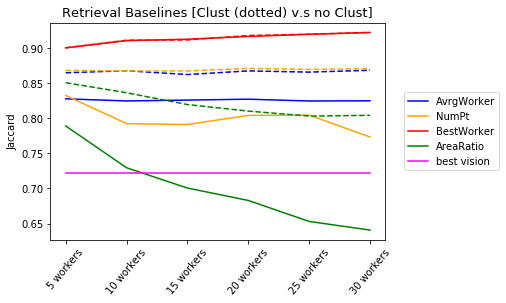

In [294]:
vision = pd.read_csv("pixel_em/vision_only_performance.csv")

NworkerPerformance = no_cluster_retreival_df.groupby("num_workers").mean()
for algo in algoMap.keys():
    algoJ = "J [{}]".format(algo)
    plt.plot(np.array(NworkerPerformance[algoJ]),label=algo,color=algoMap[algo])

NworkerPerformance = cluster_retreival_df.groupby("num_workers").mean()
for algo in  algoMap.keys():
    algoJ = "J [{}]".format(algo)
    plt.plot(np.array(NworkerPerformance[algoJ]),linestyle='--',color=algoMap[algo])

    
y = np.ones_like(np.array(NworkerPerformance[algoJ]))
vision_performance = vision.groupby(["thresh","k"],as_index=False)[['p', 'r', 'j', 'fpr', 'fnr']].mean()
plt.plot(y*max_vision_k_thresh,label="best vision",color="magenta")
vision_performance = vision.groupby(["thresh","k"],as_index=False)[['p', 'r', 'j', 'fpr', 'fnr']].mean()
max_vision_k_thresh =vision_performance.loc[vision_performance["j"].idxmax()]["j"]
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
plt.title("Retrieval Baselines [Clust (dotted) v.s no Clust]",fontsize=13)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])

# Comparing MV with EM ; clust v.s. no clust

In [282]:
df =  compile_all_algo_PRJs()
best_df =  compile_all_algo_PRJs(filter_best=True)

In [28]:
MV_clust = pd.read_csv("pixel_em/MV_full_PRJ_table.csv")
best_clust_df = MV_clust.loc[MV_clust.groupby(["num_workers","sample_num","objid"])["jaccard"].idxmax()]
best_clust_df = best_clust_df.drop(['precision','recall','jaccard'],axis=1)
best_clust_df = best_clust_df.rename(columns={'cluster':'clust'})
# There can only be one best cluster for every sample objid
assert int(best_clust_df.groupby(["num_workers","sample_num","objid"]).count()["clust"].unique())==1
best_clust_df["sample"]=best_clust_df.apply(lambda x: "{}workers_rand{}".format(int(x["num_workers"]),int(x["actualNworkers"])),axis=1)

In [29]:
best_clust = pd.read_csv("best_clust_picking.csv")

Number of objects: 21


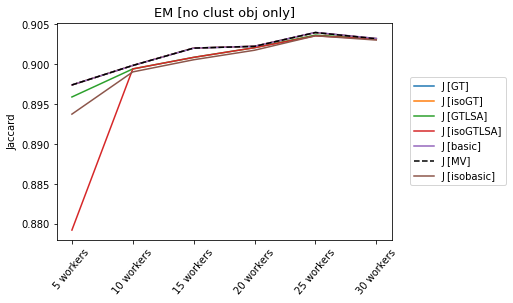

In [30]:
df_noClust = df[(df["clust"]==-1)]
print "Number of objects:",len(df_noClust.objid.unique())
Nworker_performance = df_noClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering

for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo,color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo)

plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("EM [no clust obj only]",fontsize=13)

Number of objects: 21


(0.89, 0.905)

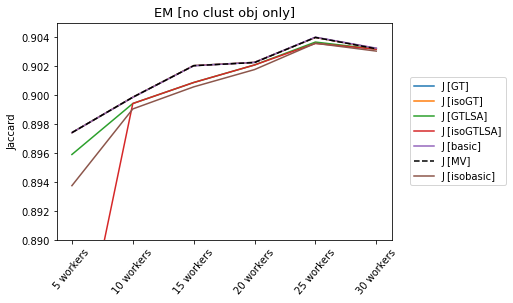

In [31]:
df_noClust = best_df[(best_df["clust"]==-1)]
print "Number of objects:",len(df_noClust.objid.unique())
Nworker_performance = df_noClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
#Nworker_performance = Nworker_performance.reindex(['5workers_rand0','10workers_rand0','15workers_rand0','20workers_rand0','25workers_rand0','30workers_rand0'])
# original "whole" MV PRJ for every object table --> MV_noClust : MV with no clustering

for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo,color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo)

plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("EM [no clust obj only]",fontsize=13)
plt.ylim(0.89,0.905)

In [33]:
# df = df[df["P [isoGTLSA]"]!=-1]
# best_df = best_df[best_df["P [isoGTLSA]"]!=-1]

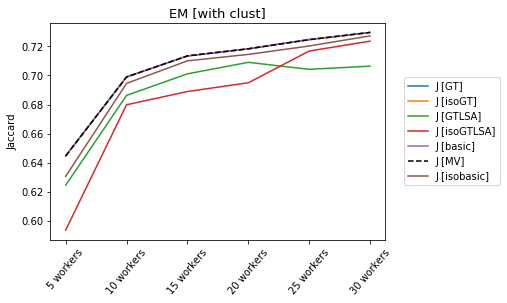

In [34]:
clustObj=clust_df.objid.unique()

df_withClust = df[(((df["clust"]==-1) &(df["objid"].isin(noClust_obj)))| ((df["clust"]!=-1) & (df["objid"].isin(clustObj))))]
Nworker_performance = df_withClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo,color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("EM [with clust]",fontsize=13)

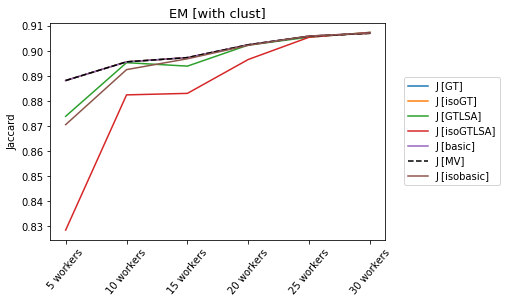

In [35]:
clustObj=clust_df.objid.unique()

df_withClust = best_df[(((best_df["clust"]==-1) &(best_df["objid"].isin(noClust_obj)))| ((best_df["clust"]!=-1) & (best_df["objid"].isin(clustObj))))]
Nworker_performance = df_withClust.groupby("num_workers").mean()
metric_J = [metric for metric in metric_keys if 'J' in metric ]
for algo in metric_J:
    if '[MV]' in algo:
        plt.plot(np.array(Nworker_performance[algo]),label=algo,color="black",linestyle="--")
    else:
        plt.plot(np.array(Nworker_performance[algo]),label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("EM [with clust]",fontsize=13)

In [312]:
len(MV)

1250

In [318]:
31*46

1426

In [316]:
len(data)

2325

In [328]:
MV

,num_workers,actualNworkers,sample_num,objid,clust,precision,recall,jaccard,FPR%,FNR%
0,10,10,0,1,0,0.994099,0.971548,0.965977,0.053734,2.845249
3,10,10,0,2,-1,0.968581,0.967563,0.938119,0.069541,3.243730
4,10,10,0,3,-1,0.959724,0.913603,0.879868,0.048123,8.639706
6,10,10,0,4,0,0.939571,0.928182,0.875894,0.064824,7.181818
8,10,10,0,5,-1,0.970021,0.895036,0.870944,0.036945,10.496419
9,10,10,0,6,-1,0.922374,0.866953,0.808000,0.016639,13.304721
11,10,1,0,7,1,0.867305,0.846274,0.749261,0.192266,15.372636
13,10,7,0,8,0,0.950200,0.930375,0.887119,0.444875,6.962468
17,10,10,0,11,-1,0.923280,0.863861,0.806005,0.037881,13.613861
18,10,10,0,13,-1,0.974245,0.949614,0.926359,0.095425,5.038588


In [392]:
data

,num_workers,actualNworkers,sample_num,objid,clust,precision,recall,jaccard,FPR%,FNR%
0,10,10,0,1,0,0.994062,0.971777,0.966168,0.054089,2.822334
3,10,10,0,2,-1,0.969934,0.968914,0.940662,0.066547,3.108575
4,10,10,0,3,-1,0.959172,0.913078,0.878918,0.048782,8.692227
6,10,10,0,4,0,0.949173,0.939394,0.894403,0.054623,6.060606
8,10,10,0,5,-1,0.968967,0.894542,0.869628,0.038265,10.545814
9,10,10,0,6,-1,0.927052,0.872675,0.816600,0.015661,12.732475
11,10,1,0,7,1,0.867305,0.846274,0.749261,0.192266,15.372636
13,10,7,0,8,0,0.950498,0.931036,0.887979,0.442393,6.896418
17,10,10,0,11,-1,0.926684,0.868193,0.812391,0.036248,13.180693
18,10,10,0,13,-1,0.974154,0.949525,0.926192,0.095763,5.047459


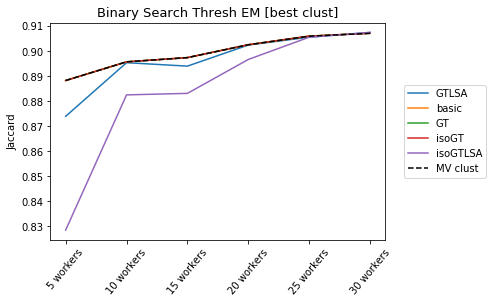

In [434]:
for algo in ['GTLSA',"basic","GT","isoGT","isoGTLSA"]:
    # we only ran on the best clusters, so the results should only be on the best clusters if not -1
    data =  pd.read_csv("pixel_em/{}_full_PRJ_table.csv".format(algo))
    data = filter_best_clust(data,best_clust_df)
    #data = data[((data["clust"]==-1) &(data["objid"].isin(noClust_obj)))| ((data["clust"]!=-1) & data["objid"].isin(clustObj))]
    #data = data[data["objid"].isin(easy_tasks)]
    plt.plot(data.groupby("num_workers").mean()["jaccard"],label=algo)
MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 
# now need to filter based on best cluster
MV = filter_best_clust(MV,best_clust_df)
# select only the best cluster if clustered object -1 if not clustered
MV = MV[((MV["clust"]==-1) &(MV["objid"].isin(noClust_obj)))| ((MV["clust"]!=-1) & MV["objid"].isin(clustObj))]
worker_df = pd.read_csv("pixel_em/individual_worker_performance.csv")
worker_df = worker_df[((worker_df["clust"]==-1) &(worker_df["objid"].isin(noClust_obj)))| ((worker_df["clust"]!=-1) & worker_df["objid"].isin(clustObj))]
raw_worker_performance = worker_df.groupby("num_workers").mean()
#MV=MV[MV["objid"].isin(easy_tasks)]
plt.plot(MV.groupby("num_workers").mean()["jaccard"],label="MV clust",color="black",linestyle="--")
# MV_noClust = MV[MV["clust"]==-1].groupby("num_workers").mean()["jaccard"]
# plt.plot(MV_noClust,label="MV no clust",color="black",linestyle="--")

plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Binary Search Thresh EM [best clust]",fontsize=13)

Debugging

In [390]:
df =  compile_all_algo_PRJs()
# best_df =  compile_all_algo_PRJs(filter_best=True)

MV len: 3255
basic
before: 3255 3100
3255 3100
isobasic
before: 3100 3100
3100 3100
GT
before: 3100 3100
3100 3100
isoGT
before: 3100 3100
3100 3100
GTLSA
before: 3100 3100
3100 3100
isoGTLSA
before: 3100 3100
3100 3100


In [377]:
data = pd.read_csv("pixel_em/isoGT_full_PRJ_table.csv")

In [378]:
len(data)

3100

In [366]:
print len(best_df) , "--> should be ",31*46
print len(df), "--> should be ",31*(46+len(clust_df.objid.unique()))

1235 --> should be  1426
1871 --> should be  2201


In [306]:
df = pd.read_csv("pixel_em/isobasic_full_PRJ_table.csv")

df[(df["num_workers"]==5)&(df["sample_num"]==0)&(df["objid"]==1)]

,num_workers,actualNworkers,sample_num,objid,clust,precision,recall,jaccard,FPR%,FNR%
2100,5,5,0,1,0,0.975025,0.978078,0.954173,0.233439,2.192178
2101,5,0,0,1,1,-1.000000,0.000000,0.000000,0.000000,100.000000
2102,5,5,0,1,-1,0.975025,0.978078,0.954173,0.233439,2.192178


In [307]:
df = pd.read_csv("pixel_em/MV_full_PRJ_table.csv")

df[(df["num_workers"]==5)&(df["sample_num"]==0)&(df["objid"]==1)]

,num_workers,actualNworkers,sample_num,objid,clust,precision,recall,jaccard,FPR%,FNR%
2205,5,5,0,1,0,0.977603,0.980179,0.958651,0.209241,1.982126
2206,5,0,0,1,1,-1.000000,0.000000,0.000000,0.000000,100.000000
2207,5,5,0,1,-1,0.977603,0.980179,0.958651,0.209241,1.982126


In [349]:
df = pd.read_csv("pixel_em/all_PRJ_table.csv",index_col=0)

In [350]:
df[(df["num_workers"]==5)&(df["sample_num"]==0)&(df["objid"]==1)]

,num_workers,actualNworkers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],...,P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],P [isobasic],R [isobasic],J [isobasic],FPR% [isobasic],FNR% [isobasic]
1351,5,5,0,1,0,0.977603,0.980179,0.958651,0.209241,1.982126,...,0.975025,0.978078,0.954173,0.233439,2.192178,0.975025,0.978078,0.954173,0.233439,2.192178


In [351]:
obj_missing_noclust = [[5, 0, 1], [5, 0, 4], [5, 0, 7], [5, 0, 8], [5, 0, 10], [5, 0, 15], [5, 0, 18], [5, 0, 20], [5, 0, 21], [5, 0, 22], [5, 0, 25], [5, 0, 26], [5, 0, 27], [5, 0, 28], [5, 0, 29], [5, 0, 30], [5, 0, 31], [5, 0, 32], [5, 0, 33], [5, 0, 34], [5, 0, 37], [5, 0, 40], [5, 0, 41], [5, 0, 42], [5, 0, 47], [5, 1, 1], [5, 1, 4], [5, 1, 7], [5, 1, 8], [5, 1, 10], [5, 1, 15], [5, 1, 18], [5, 1, 20], [5, 1, 21], [5, 1, 22], [5, 1, 25], [5, 1, 26], [5, 1, 27], [5, 1, 28], [5, 1, 29], [5, 1, 30], [5, 1, 31], [5, 1, 32], [5, 1, 33], [5, 1, 34], [5, 1, 37], [5, 1, 40], [5, 1, 41], [5, 1, 42], [5, 1, 47], [5, 2, 1], [5, 2, 4], [5, 2, 7], [5, 2, 8], [5, 2, 10], [5, 2, 15], [5, 2, 18], [5, 2, 20], [5, 2, 21], [5, 2, 22], [5, 2, 25], [5, 2, 26], [5, 2, 27], [5, 2, 28], [5, 2, 29], [5, 2, 30], [5, 2, 31], [5, 2, 32], [5, 2, 33], [5, 2, 34], [5, 2, 37], [5, 2, 40], [5, 2, 41], [5, 2, 42], [5, 2, 47], [5, 3, 1], [5, 3, 4], [5, 3, 7], [5, 3, 8], [5, 3, 10], [5, 3, 15], [5, 3, 18], [5, 3, 20], [5, 3, 21], [5, 3, 22], [5, 3, 25], [5, 3, 26], [5, 3, 27], [5, 3, 28], [5, 3, 29], [5, 3, 30], [5, 3, 31], [5, 3, 32], [5, 3, 33], [5, 3, 34], [5, 3, 37], [5, 3, 40], [5, 3, 41], [5, 3, 42], [5, 3, 47], [5, 4, 1], [5, 4, 4], [5, 4, 7], [5, 4, 8], [5, 4, 10], [5, 4, 15], [5, 4, 18], [5, 4, 20], [5, 4, 21], [5, 4, 22], [5, 4, 25], [5, 4, 26], [5, 4, 27], [5, 4, 28], [5, 4, 29], [5, 4, 30], [5, 4, 31], [5, 4, 32], [5, 4, 33], [5, 4, 34], [5, 4, 37], [5, 4, 40], [5, 4, 41], [5, 4, 42], [5, 4, 47], [5, 5, 1], [5, 5, 4], [5, 5, 7], [5, 5, 8], [5, 5, 10], [5, 5, 15], [5, 5, 18], [5, 5, 20], [5, 5, 21], [5, 5, 22], [5, 5, 25], [5, 5, 26], [5, 5, 27], [5, 5, 28], [5, 5, 29], [5, 5, 30], [5, 5, 31], [5, 5, 32], [5, 5, 33], [5, 5, 34], [5, 5, 37], [5, 5, 40], [5, 5, 41], [5, 5, 42], [5, 5, 47], [5, 6, 1], [5, 6, 4], [5, 6, 7], [5, 6, 8], [5, 6, 10], [5, 6, 15], [5, 6, 18], [5, 6, 20], [5, 6, 21], [5, 6, 22], [5, 6, 25], [5, 6, 26], [5, 6, 27], [5, 6, 28], [5, 6, 29], [5, 6, 30], [5, 6, 31], [5, 6, 32], [5, 6, 33], [5, 6, 34], [5, 6, 37], [5, 6, 40], [5, 6, 41], [5, 6, 42], [5, 6, 47], [5, 7, 1], [5, 7, 4], [5, 7, 7], [5, 7, 8], [5, 7, 10], [5, 7, 15], [5, 7, 18], [5, 7, 20], [5, 7, 21], [5, 7, 22], [5, 7, 25], [5, 7, 26], [5, 7, 27], [5, 7, 28], [5, 7, 29], [5, 7, 30], [5, 7, 31], [5, 7, 32], [5, 7, 33], [5, 7, 34], [5, 7, 37], [5, 7, 40], [5, 7, 41], [5, 7, 42], [5, 7, 47], [5, 8, 1], [5, 8, 4], [5, 8, 7], [5, 8, 8], [5, 8, 10], [5, 8, 15], [5, 8, 18], [5, 8, 20], [5, 8, 21], [5, 8, 22], [5, 8, 25], [5, 8, 26], [5, 8, 27], [5, 8, 28], [5, 8, 29], [5, 8, 30], [5, 8, 31], [5, 8, 32], [5, 8, 33], [5, 8, 34], [5, 8, 37], [5, 8, 40], [5, 8, 41], [5, 8, 42], [5, 8, 47], [5, 9, 1], [5, 9, 4], [5, 9, 7], [5, 9, 8], [5, 9, 10], [5, 9, 15], [5, 9, 18], [5, 9, 20], [5, 9, 21], [5, 9, 22], [5, 9, 25], [5, 9, 26], [5, 9, 27], [5, 9, 28], [5, 9, 29], [5, 9, 30], [5, 9, 31], [5, 9, 32], [5, 9, 33], [5, 9, 34], [5, 9, 37], [5, 9, 40], [5, 9, 41], [5, 9, 42], [5, 9, 47], [10, 0, 1], [10, 0, 4], [10, 0, 7], [10, 0, 8], [10, 0, 10], [10, 0, 15], [10, 0, 18], [10, 0, 20], [10, 0, 21], [10, 0, 22], [10, 0, 25], [10, 0, 26], [10, 0, 27], [10, 0, 28], [10, 0, 29], [10, 0, 30], [10, 0, 31], [10, 0, 32], [10, 0, 33], [10, 0, 34], [10, 0, 37], [10, 0, 40], [10, 0, 41], [10, 0, 42], [10, 0, 47], [10, 1, 1], [10, 1, 4], [10, 1, 7], [10, 1, 8], [10, 1, 10], [10, 1, 15], [10, 1, 18], [10, 1, 20], [10, 1, 21], [10, 1, 22], [10, 1, 25], [10, 1, 26], [10, 1, 27], [10, 1, 28], [10, 1, 29], [10, 1, 30], [10, 1, 31], [10, 1, 32], [10, 1, 33], [10, 1, 34], [10, 1, 37], [10, 1, 40], [10, 1, 41], [10, 1, 42], [10, 1, 47], [10, 2, 1], [10, 2, 4], [10, 2, 7], [10, 2, 8], [10, 2, 10], [10, 2, 15], [10, 2, 18], [10, 2, 20], [10, 2, 21], [10, 2, 22], [10, 2, 25], [10, 2, 26], [10, 2, 27], [10, 2, 28], [10, 2, 29], [10, 2, 30], [10, 2, 31], [10, 2, 32], [10, 2, 33], [10, 2, 34], [10, 2, 37], [10, 2, 40], [10, 2, 41], [10, 2, 42], [10, 2, 47], [10, 3, 1], [10, 3, 4], [10, 3, 7], [10, 3, 8], [10, 3, 10], [10, 3, 15], [10, 3, 18], [10, 3, 20], [10, 3, 21], [10, 3, 22], [10, 3, 25], [10, 3, 26], [10, 3, 27], [10, 3, 28], [10, 3, 29], [10, 3, 30], [10, 3, 31], [10, 3, 32], [10, 3, 33], [10, 3, 34], [10, 3, 37], [10, 3, 40], [10, 3, 41], [10, 3, 42], [10, 3, 47], [10, 4, 1], [10, 4, 4], [10, 4, 7], [10, 4, 8], [10, 4, 10], [10, 4, 15], [10, 4, 18], [10, 4, 20], [10, 4, 21], [10, 4, 22], [10, 4, 25], [10, 4, 26], [10, 4, 27], [10, 4, 28], [10, 4, 29], [10, 4, 30], [10, 4, 31], [10, 4, 32], [10, 4, 33], [10, 4, 34], [10, 4, 37], [10, 4, 40], [10, 4, 41], [10, 4, 42], [10, 4, 47], [10, 5, 1], [10, 5, 4], [10, 5, 7], [10, 5, 8], [10, 5, 10], [10, 5, 15], [10, 5, 18], [10, 5, 20], [10, 5, 21], [10, 5, 22], [10, 5, 25], [10, 5, 26], [10, 5, 27], [10, 5, 28], [10, 5, 29], [10, 5, 30], [10, 5, 31], [10, 5, 32], [10, 5, 33], [10, 5, 34], [10, 5, 37], [10, 5, 40], [10, 5, 41], [10, 5, 42], [10, 5, 47], [10, 6, 1], [10, 6, 4], [10, 6, 7], [10, 6, 8], [10, 6, 10], [10, 6, 15], [10, 6, 18], [10, 6, 20], [10, 6, 21], [10, 6, 22], [10, 6, 25], [10, 6, 26], [10, 6, 27], [10, 6, 28], [10, 6, 29], [10, 6, 30], [10, 6, 31], [10, 6, 32], [10, 6, 33], [10, 6, 34], [10, 6, 37], [10, 6, 40], [10, 6, 41], [10, 6, 42], [10, 6, 47], [10, 7, 1], [10, 7, 4], [10, 7, 7], [10, 7, 8], [10, 7, 10], [10, 7, 15], [10, 7, 18], [10, 7, 20], [10, 7, 21], [10, 7, 22], [10, 7, 25], [10, 7, 26], [10, 7, 27], [10, 7, 28], [10, 7, 29], [10, 7, 30], [10, 7, 31], [10, 7, 32], [10, 7, 33], [10, 7, 34], [10, 7, 37], [10, 7, 40], [10, 7, 41], [10, 7, 42], [10, 7, 47], [15, 0, 1], [15, 0, 4], [15, 0, 7], [15, 0, 8], [15, 0, 10], [15, 0, 15], [15, 0, 18], [15, 0, 20], [15, 0, 21], [15, 0, 22], [15, 0, 25], [15, 0, 26], [15, 0, 27], [15, 0, 28], [15, 0, 29], [15, 0, 30], [15, 0, 31], [15, 0, 32], [15, 0, 33], [15, 0, 34], [15, 0, 37], [15, 0, 40], [15, 0, 41], [15, 0, 42], [15, 0, 47], [15, 1, 1], [15, 1, 4], [15, 1, 7], [15, 1, 8], [15, 1, 10], [15, 1, 15], [15, 1, 18], [15, 1, 20], [15, 1, 21], [15, 1, 22], [15, 1, 25], [15, 1, 26], [15, 1, 27], [15, 1, 28], [15, 1, 29], [15, 1, 30], [15, 1, 31], [15, 1, 32], [15, 1, 33], [15, 1, 34], [15, 1, 37], [15, 1, 40], [15, 1, 41], [15, 1, 42], [15, 1, 47], [15, 2, 1], [15, 2, 4], [15, 2, 7], [15, 2, 8], [15, 2, 10], [15, 2, 15], [15, 2, 18], [15, 2, 20], [15, 2, 21], [15, 2, 22], [15, 2, 25], [15, 2, 26], [15, 2, 27], [15, 2, 28], [15, 2, 29], [15, 2, 30], [15, 2, 31], [15, 2, 32], [15, 2, 33], [15, 2, 34], [15, 2, 37], [15, 2, 40], [15, 2, 41], [15, 2, 42], [15, 2, 47], [15, 3, 1], [15, 3, 4], [15, 3, 7], [15, 3, 8], [15, 3, 10], [15, 3, 15], [15, 3, 18], [15, 3, 20], [15, 3, 21], [15, 3, 22], [15, 3, 25], [15, 3, 26], [15, 3, 27], [15, 3, 28], [15, 3, 29], [15, 3, 30], [15, 3, 31], [15, 3, 32], [15, 3, 33], [15, 3, 34], [15, 3, 37], [15, 3, 40], [15, 3, 41], [15, 3, 42], [15, 3, 47], [15, 4, 1], [15, 4, 4], [15, 4, 7], [15, 4, 8], [15, 4, 10], [15, 4, 15], [15, 4, 18], [15, 4, 20], [15, 4, 21], [15, 4, 22], [15, 4, 25], [15, 4, 26], [15, 4, 27], [15, 4, 28], [15, 4, 29], [15, 4, 30], [15, 4, 31], [15, 4, 32], [15, 4, 33], [15, 4, 34], [15, 4, 37], [15, 4, 40], [15, 4, 41], [15, 4, 42], [15, 4, 47], [15, 5, 1], [15, 5, 4], [15, 5, 7], [15, 5, 8], [15, 5, 10], [15, 5, 15], [15, 5, 18], [15, 5, 20], [15, 5, 21], [15, 5, 22], [15, 5, 25], [15, 5, 26], [15, 5, 27], [15, 5, 28], [15, 5, 29], [15, 5, 30], [15, 5, 31], [15, 5, 32], [15, 5, 33], [15, 5, 34], [15, 5, 37], [15, 5, 40], [15, 5, 41], [15, 5, 42], [15, 5, 47], [20, 0, 1], [20, 0, 4], [20, 0, 7], [20, 0, 8], [20, 0, 10], [20, 0, 15], [20, 0, 18], [20, 0, 20], [20, 0, 21], [20, 0, 22], [20, 0, 25], [20, 0, 26], [20, 0, 27], [20, 0, 28], [20, 0, 29], [20, 0, 30], [20, 0, 31], [20, 0, 32], [20, 0, 33], [20, 0, 34], [20, 0, 37], [20, 0, 40], [20, 0, 41], [20, 0, 42], [20, 0, 47], [20, 1, 1], [20, 1, 4], [20, 1, 7], [20, 1, 8], [20, 1, 10], [20, 1, 15], [20, 1, 18], [20, 1, 20], [20, 1, 21], [20, 1, 22], [20, 1, 25], [20, 1, 26], [20, 1, 27], [20, 1, 28], [20, 1, 29], [20, 1, 30], [20, 1, 31], [20, 1, 32], [20, 1, 33], [20, 1, 34], [20, 1, 37], [20, 1, 40], [20, 1, 41], [20, 1, 42], [20, 1, 47], [20, 2, 1], [20, 2, 4], [20, 2, 7], [20, 2, 8], [20, 2, 10], [20, 2, 15], [20, 2, 18], [20, 2, 20], [20, 2, 21], [20, 2, 22], [20, 2, 25], [20, 2, 26], [20, 2, 27], [20, 2, 28], [20, 2, 29], [20, 2, 30], [20, 2, 31], [20, 2, 32], [20, 2, 33], [20, 2, 34], [20, 2, 37], [20, 2, 40], [20, 2, 41], [20, 2, 42], [20, 2, 47], [20, 3, 1], [20, 3, 4], [20, 3, 7], [20, 3, 8], [20, 3, 10], [20, 3, 15], [20, 3, 18], [20, 3, 20], [20, 3, 21], [20, 3, 22], [20, 3, 25], [20, 3, 26], [20, 3, 27], [20, 3, 28], [20, 3, 29], [20, 3, 30], [20, 3, 31], [20, 3, 32], [20, 3, 33], [20, 3, 34], [20, 3, 37], [20, 3, 40], [20, 3, 41], [20, 3, 42], [20, 3, 47], [25, 0, 1], [25, 0, 4], [25, 0, 7], [25, 0, 8], [25, 0, 10], [25, 0, 15], [25, 0, 18], [25, 0, 20], [25, 0, 21], [25, 0, 22], [25, 0, 25], [25, 0, 26], [25, 0, 27], [25, 0, 28], [25, 0, 29], [25, 0, 30], [25, 0, 31], [25, 0, 32], [25, 0, 33], [25, 0, 34], [25, 0, 37], [25, 0, 40], [25, 0, 41], [25, 0, 42], [25, 0, 47], [25, 1, 1], [25, 1, 4], [25, 1, 7], [25, 1, 8], [25, 1, 10], [25, 1, 15], [25, 1, 18], [25, 1, 20], [25, 1, 21], [25, 1, 22], [25, 1, 25], [25, 1, 26], [25, 1, 27], [25, 1, 28], [25, 1, 29], [25, 1, 30], [25, 1, 31], [25, 1, 32], [25, 1, 33], [25, 1, 34], [25, 1, 37], [25, 1, 40], [25, 1, 41], [25, 1, 42], [25, 1, 47], [30, 0, 1], [30, 0, 4], [30, 0, 7], [30, 0, 8], [30, 0, 10], [30, 0, 15], [30, 0, 18], [30, 0, 20], [30, 0, 21], [30, 0, 22], [30, 0, 25], [30, 0, 26], [30, 0, 27], [30, 0, 28], [30, 0, 29], [30, 0, 30], [30, 0, 31], [30, 0, 32], [30, 0, 33], [30, 0, 34], [30, 0, 37], [30, 0, 40], [30, 0, 41], [30, 0, 42], [30, 0, 47]]

In [359]:
o = obj_missing_noclust[1]
df[(df["num_workers"]==o[0])&(df["sample_num"]==o[1])&(df["objid"]==o[2])]

,num_workers,actualNworkers,sample_num,objid,clust,P [MV],R [MV],J [MV],FPR% [MV],FNR% [MV],...,P [isoGTLSA],R [isoGTLSA],J [isoGTLSA],FPR% [isoGTLSA],FNR% [isoGTLSA],P [isobasic],R [isobasic],J [isobasic],FPR% [isobasic],FNR% [isobasic]
1354,5,4,0,4,0,0.952515,0.923939,0.883256,0.050016,7.606061,...,0.950467,0.924545,0.882047,0.05232,7.545455,0.952515,0.923939,0.883256,0.050016,7.606061


In [406]:
algo_df = pd.read_csv("pixel_em/MV_full_PRJ_table.csv")

algo_df[(algo_df["num_workers"]==o[0])&(algo_df["sample_num"]==o[1])&(algo_df["objid"]==o[2])]

,num_workers,actualNworkers,sample_num,objid,clust,precision,recall,jaccard,FPR%,FNR%
2210,5,4,0,4,0,0.952515,0.923939,0.883256,0.050016,7.606061
2211,5,1,0,4,1,0.447659,0.933030,0.433723,1.250082,6.696970
2212,5,5,0,4,-1,0.926200,0.946970,0.880530,0.081935,5.303030


In [407]:
len(algo_df)

3255

In [449]:
MV = pd.read_csv("pixel_em/MV_full_PRJ_table.csv") 

In [456]:
len(MV[MV["precision"]==-1])

319

In [477]:
len(MV[MV["actualNworkers"]<1])

314

In [478]:
MV[((MV["precision"]==-1)&(MV["actualNworkers"]>1))]

,num_workers,actualNworkers,sample_num,objid,clust,precision,recall,jaccard,FPR%,FNR%
92,10,2,0,47,2,-1,0,0,0,100
144,10,2,1,22,1,-1,0,0,0,100
459,10,2,4,22,1,-1,0,0,0,100
2034,25,2,1,22,1,-1,0,0,0,100
3102,5,2,8,29,0,-1,0,0,0,100


In [467]:
#noclust case
MV[MV["clust"]==-1].groupby(["num_workers"]).mean()["jaccard"]

num_workers
5     0.867514
10    0.869914
15    0.878147
20    0.878718
25    0.879830
30    0.883050
Name: jaccard, dtype: float64

In [470]:
MV_clust = filter_best_clust(MV,best_clust_df)

In [471]:
MV_clust.groupby(["num_workers"]).mean()["jaccard"]

num_workers
5     0.888169
10    0.895627
15    0.897310
20    0.902423
25    0.905856
30    0.907000
Name: jaccard, dtype: float64

# Greedy Results

In [479]:
greedy_df = pd.read_csv("all_greedy_result.csv")
greedy_df["num_workers"]=greedy_df.apply(lambda x:int(x["sample"].split("workers")[0]),axis=1)
greedy_df["sample_num"] = greedy_df.apply(lambda x: int(x["sample"].split("rand")[-1]),axis=1)
greedy_noclust=greedy_df[greedy_df["clust"]==-1]
greedy_clust= filter_best_clust(greedy_df,best_clust_df)

In [605]:
greedy_noclust[(greedy_noclust["sample"]=="25workers_rand0")&(greedy_noclust["algo"]=="basic")]

,sample,objid,clust,algo,p,r,j,fpr,fnr,num_workers,sample_num
1,25workers_rand0,1,-1,basic,0.986404,0.980866,0.967782,0.125971,1.913382,25,0
17,25workers_rand0,2,-1,basic,0.956827,0.981829,0.940178,0.098156,1.817090,25,0
25,25workers_rand0,3,-1,basic,0.954869,0.916754,0.878681,0.054385,8.324580,25,0
33,25workers_rand0,4,-1,basic,0.940805,0.948788,0.895339,0.064824,5.121212,25,0
49,25workers_rand0,5,-1,basic,0.959258,0.907138,0.873484,0.051460,9.286244,25,0
57,25workers_rand0,6,-1,basic,0.918759,0.889843,0.824934,0.017944,11.015737,25,0
65,25workers_rand0,7,-1,basic,0.897563,0.565295,0.531034,0.095803,43.470523,25,0
81,25workers_rand0,8,-1,basic,0.956068,0.903878,0.867833,0.378941,9.612246,25,0
97,25workers_rand0,9,-1,basic,0.977841,0.944723,0.924922,0.067348,5.527745,25,0
105,25workers_rand0,10,-1,basic,0.970327,0.978955,0.950501,0.173557,2.104452,25,0


In [598]:
greedy_noclust.groupby(["sample"])["objid"].count().unique()[0]

352

In [599]:
8*46

368

In [574]:
8*46*31

11408

In [572]:
len(greedy_noclust)

10912

In [571]:
len(greedy_clust)

9800

In [489]:
algoMap = {
    'GTLSA':'orange',
    "basic":'green',
    "GT":'blue',
    "isoGT":'red',
    "isoGTLSA": 'cyan',
    "isobasic": 'magenta',
    "worker_fraction": 'pink',
    "ground_truth": 'yellow'
}

In [567]:
from analyze_prjs import clust_vs_noclust

(0.82, 0.99)

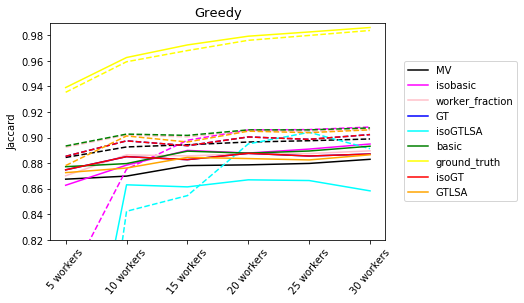

In [550]:
x,MV_noclust,MV_clust=clust_vs_noclust('MV',filtered=False)

plt.plot(MV_noclust,label="MV",color="black")
plt.plot(MV_clust,color="black",linestyle="--")

for algo in algoMap.keys():
    algo_noClust = np.array(greedy_noclust[greedy_noclust["algo"]==algo].groupby(["num_workers"]).mean()["j"])
    algo_clust = np.array(greedy_clust[greedy_clust["algo"]==algo].groupby(["num_workers"]).mean()["j"])
    plt.plot(algo_noClust,label=algo,color=algoMap[algo])
    plt.plot(algo_clust,color=algoMap[algo],linestyle='--')
    
    
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xticks(rotation=50)
a = gca().set_xticklabels([0,'5 workers','10 workers','15 workers','20 workers','25 workers','30 workers'])
plt.title("Greedy",fontsize=13)
plt.ylim(0.82,0.99)

In [542]:
def avrg_percent_change(clust,noClust):
    return "{:.3f}%".format(np.mean(np.array(clust)-np.array(noClust))*100)

In [570]:
metric="j"
print algo
algo_noClust = np.array(greedy_noclust[greedy_noclust["algo"]==algo].groupby(["num_workers"]).mean()[metric])
algo_clust = np.array(greedy_clust[greedy_clust["algo"]==algo].groupby(["num_workers"]).mean()[metric])
x,noclust,clust=clust_vs_noclust(algo,metric="jaccard",filtered=False)
print algo_noClust
print algo_clust
print noclust
print clust

isobasic
[ 0.86276554  0.87850452  0.89000564  0.88793944  0.89104829  0.89500366]
[ 0.78350853  0.87535421  0.89792796  0.90600254  0.90627896  0.9082636 ]
[0.85781492875851872, 0.86802311695963508, 0.87573303802792213, 0.87824658643241371, 0.87929402040155502, 0.88360961824102102]
[0.86624324773734884, 0.88965522520502249, 0.89131713375796051, 0.8963493592324806, 0.89771185300779321, 0.89909160253396703]


In [562]:


for metric in ['precision', u'recall', u'jaccard', u'FNR%','FPR%']:
    print "------------"
    print "percent change for metric:",metric
    for algo in algoMap.keys():
        algo_noClust = np.array(greedy_noclust[greedy_noclust["algo"]==algo].groupby(["num_workers"]).mean()[metric])
        algo_clust = np.array(greedy_clust[greedy_clust["algo"]==algo].groupby(["num_workers"]).mean()[metric])
        print "{} :{}".format(algo,avrg_percent_change(algo_clust,algo_noClust))
    x,MV_noclust,MV_clust=clust_vs_noclust('MV',metric= metric,filtered=False)
    print "{} :{}".format("MV",avrg_percent_change(MV_clust,MV_noclust))

------------
percent change for metric: precision


KeyError: 'precision'

In [530]:
algo = "ground_truth"
algo_noClust = np.array(greedy_noclust[greedy_noclust["algo"]==algo].groupby(["num_workers"]).mean()["j"])
algo_clust = np.array(greedy_clust[greedy_clust["algo"]==algo].groupby(["num_workers"]).mean()["j"])

In [540]:
print "When using ground truth to estimate intersection areas, we can achieve a Jaccard of {:.3f}".format(algo_noClust[-1]) ," as an upper bound with 30 workers, which indicates that with better probablistic estimation of intersection area, aggregation-based methods can achieve close to perfect estimation, exceeding the results of any single `best' worker."

When using ground truth to estimate intersection areas, we can achieve a Jaccard of 0.986  as an upper bound with 30 workers, which indicates that with better probablistic estimation of intersection area, aggregation-based methods can achieve close to perfect estimation, exceeding the results of any single `best' worker.


# Relationship between actual number of workers and how much in the cluster is actually ran

In [39]:
df["ratio_Nworker"]=df["actualNworkers"]/df["num_workers"]

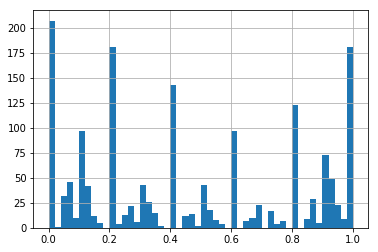

In [43]:
# df["ratio_Nworker"].hist()
df[df["clust"]!=-1]["ratio_Nworker"].hist(bins=50)

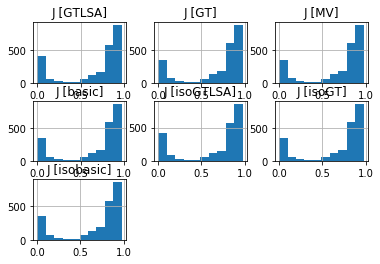

In [56]:
a = df_withClust[metric_J].hist()

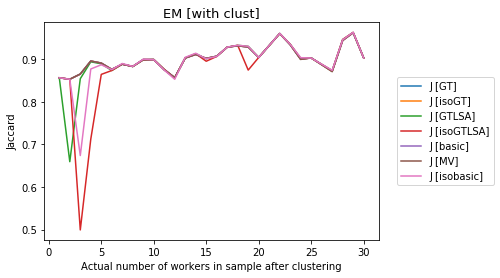

In [58]:
clustObj=clust_df.objid.unique()

df_withClust = best_df[(((best_df["clust"]==-1) &(best_df["objid"].isin(noClust_obj)))| ((best_df["clust"]!=-1) & (best_df["objid"].isin(clustObj))))]

metric_J = [metric for metric in metric_keys if 'J' in metric ]
for algo in metric_J:
    #plt.plot(df_withClust["actualNworkers"],df_withClust[algo],'o',label=algo)
    plt.plot(df_withClust.groupby(["actualNworkers"]).mean()[algo],label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xlabel("Actual number of workers in sample after clustering")
# plt.xticks(rotation=50)
plt.title("EM [with clust]",fontsize=13)

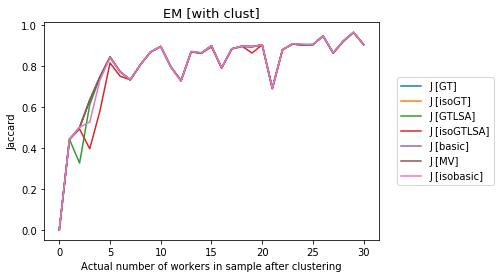

In [59]:
clustObj=clust_df.objid.unique()

df_withClust = df[(((df["clust"]==-1) &(df["objid"].isin(noClust_obj)))| ((df["clust"]!=-1) & (df["objid"].isin(clustObj))))]

metric_J = [metric for metric in metric_keys if 'J' in metric ]
for algo in metric_J:
    #plt.plot(df_withClust["actualNworkers"],df_withClust[algo],'o',label=algo)
    plt.plot(df_withClust.groupby(["actualNworkers"]).mean()[algo],label=algo)
plt.legend(bbox_to_anchor=(1.04,0.5),loc="center left")    
plt.ylabel("Jaccard")
plt.xlabel("Actual number of workers in sample after clustering")
# plt.xticks(rotation=50)
plt.title("EM [with clust]",fontsize=13)

# Gt-est by best worker picking based on worker quality, also correlation with individual worker

In [331]:
from scipy.stats  import pearsonr
from scipy.stats import linregress

In [393]:
qj_df = pd.read_csv("EM_worker_qualities_against_real_performance.csv",index_col=0)

In [397]:
qj_df["num_workers"] = qj_df.apply(lambda x: int(x["sample"].split("workers")[0]),axis=1)

In [423]:
def corr_calc(selected_df):
    x = np.array(selected_df["qj"])
    y = np.array(selected_df["Jaccard [Self]"])
    linresult = linregress(x,y)
    return linresult.rvalue#,linresult.pvalue

In [428]:
objid

15

In [429]:
cluster_id

1

In [427]:
sample_name

'25workers_rand0'

In [424]:
df_data = []
for sample_name in tqdm(sample_lst):
    for objid in object_lst:
        cluster_ids = clust_df[(clust_df["objid"] == objid)].cluster.unique()
        for cluster_id in ["-1"] + list(cluster_ids):
            worker_ids = np.array(clust_df[(clust_df["objid"] == objid) & (clust_df["cluster"] == int(cluster_id))].wid)
            if len(worker_ids) > 1 or cluster_id == "-1":
#                 if cluster_id!="" and cluster_id!="-1"  :
#                     outdir = '{}{}/obj{}/clust{}/'.format(PIXEL_EM_DIR, sample_name, objid,cluster_id)
#                 else:
#                     outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
                selected_df = qj_df[(qj_df["sample"]==sample_name)&(qj_df["objid"]==objid)&(qj_df["clust"]==int(cluster_id))]
                print corr_calc(selected_df)

  0%|          | 0/31 [00:00<?, ?it/s]

0.998801169602
0.937725959284
-1.0
0.875460124019
0.840311308984
0.965476606268
0.843922402805
1.0
0.796309606116
0.625560163544
-0.910777938219
0.318929912212
0.597858992001
0.925651520643
0.894711510162
0.660257891514
1.0
0.942143514439
0.988877956979
0.862931716035
1.0
0.689860861068
0.876485104653
0.82752106246
0.668045862005
0.88149988719
0.88149988719


ValueError: Inputs must not be empty.

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


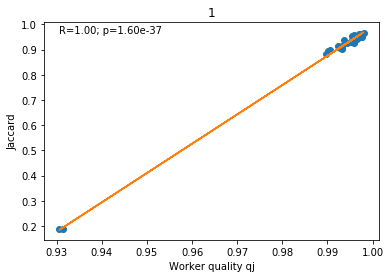

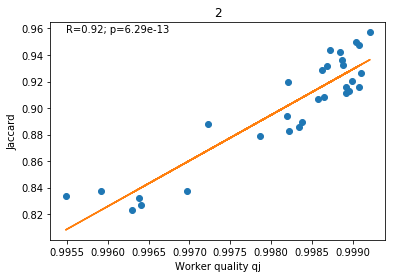

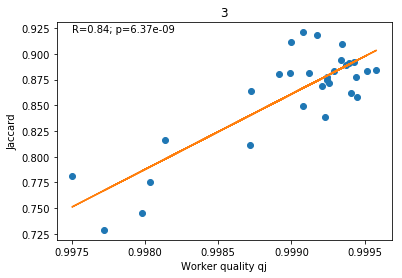

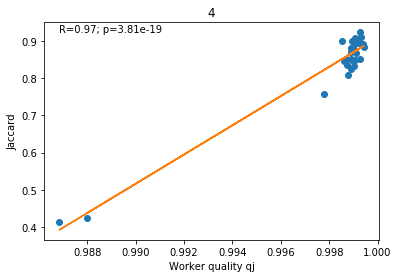

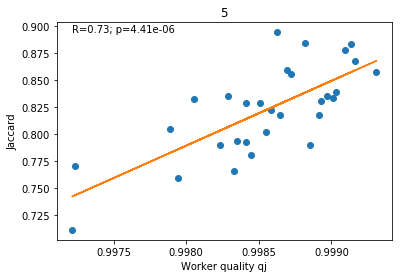

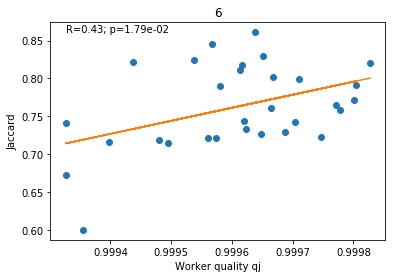

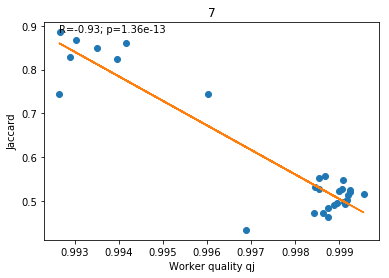

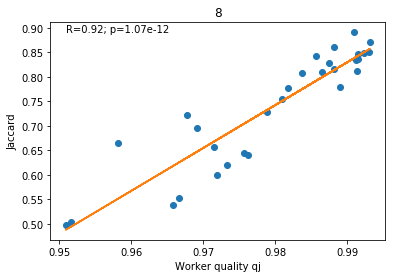

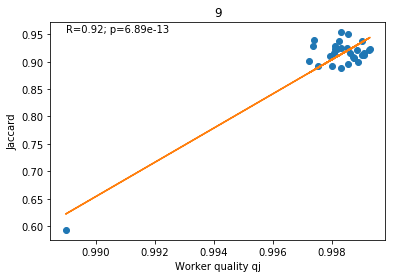

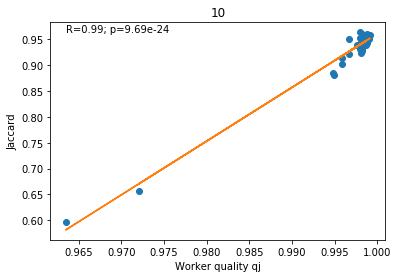

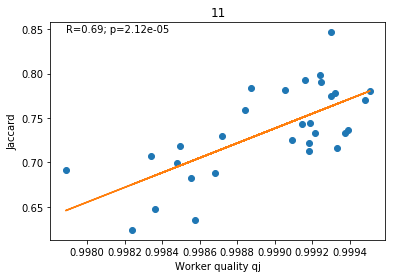

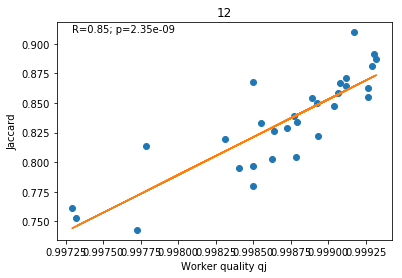

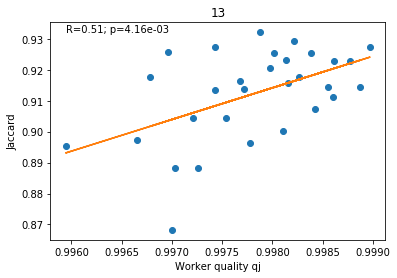

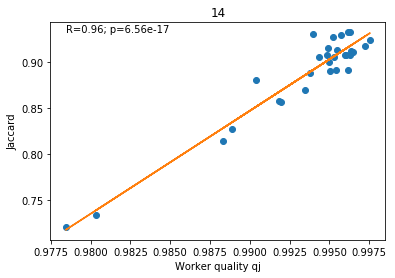

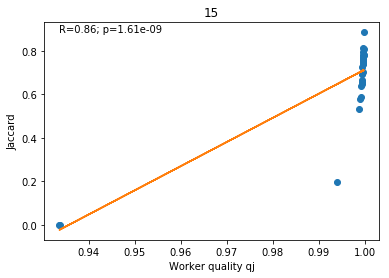

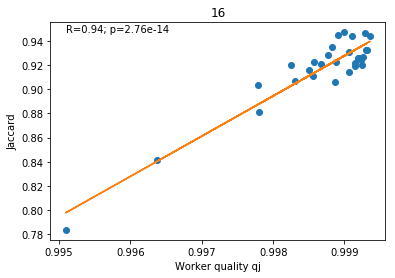

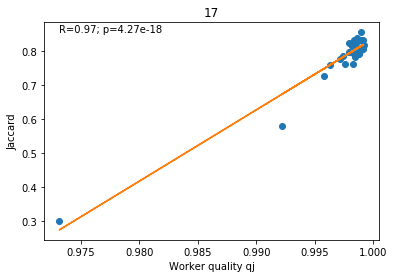

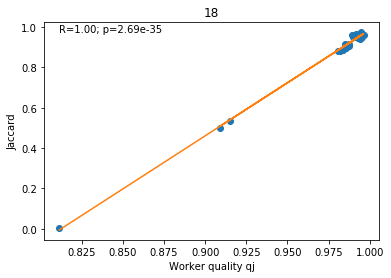

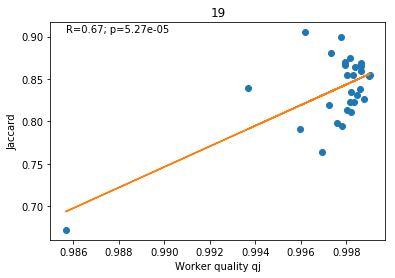

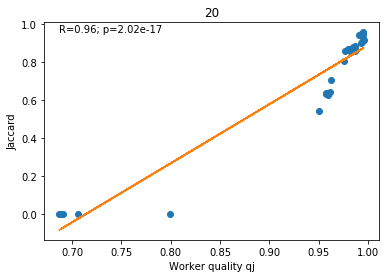

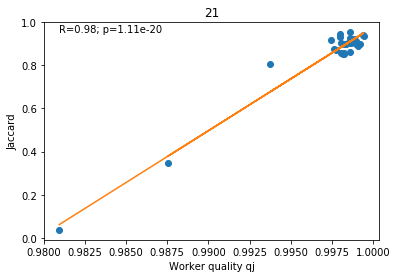

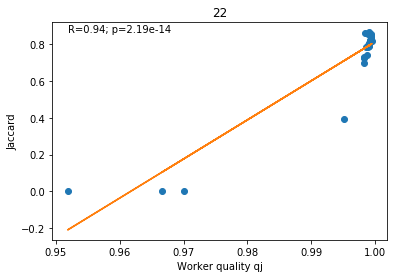

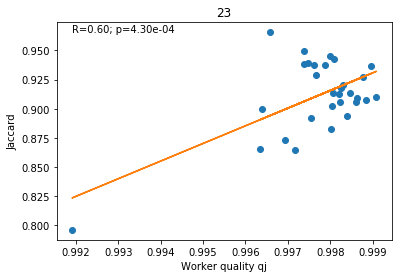

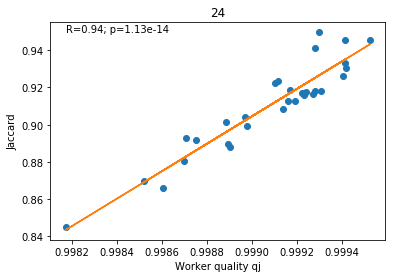

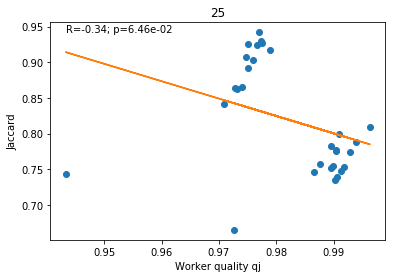

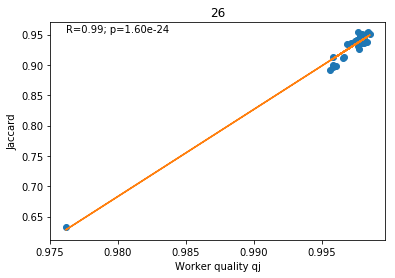

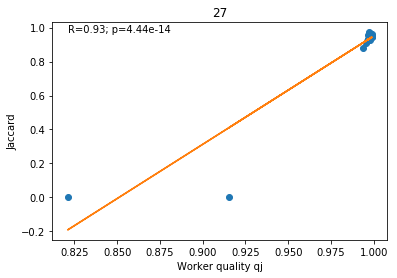

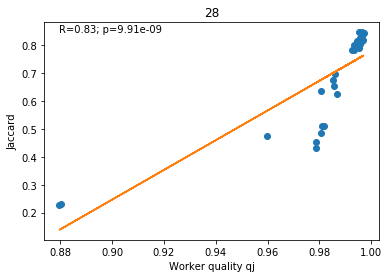

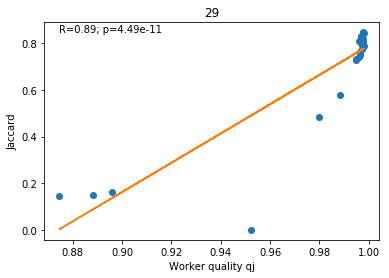

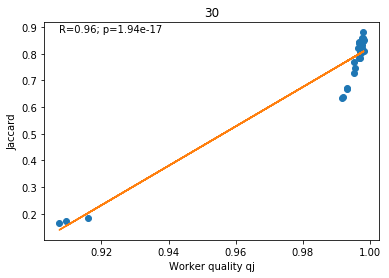

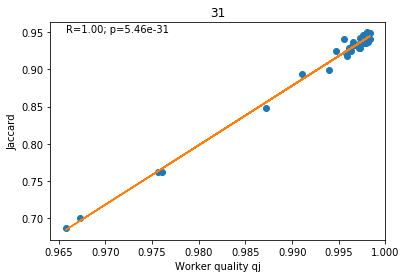

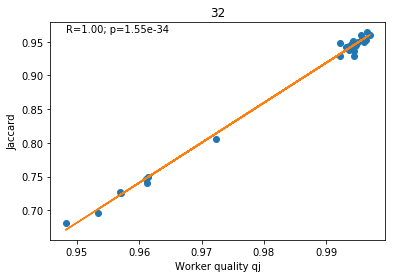

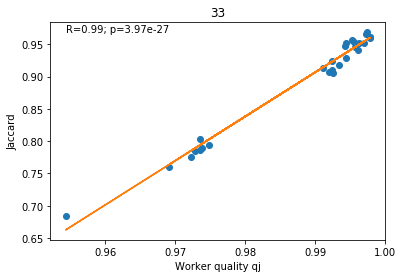

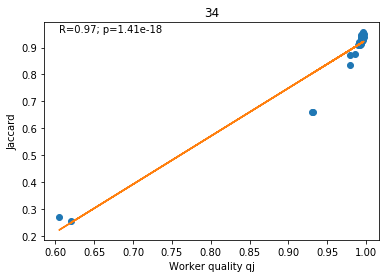

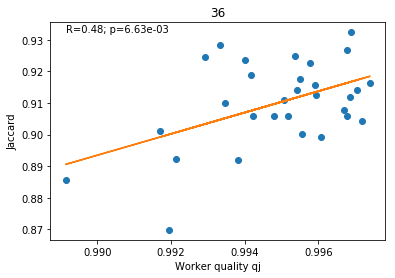

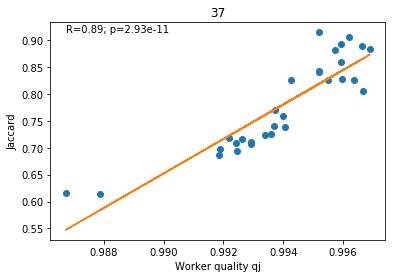

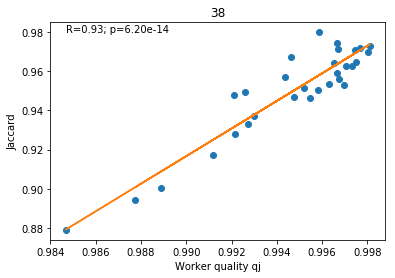

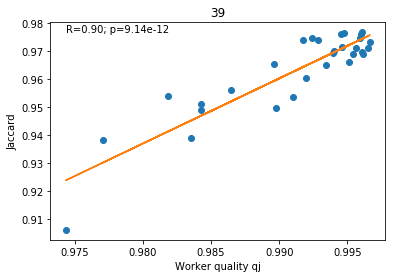

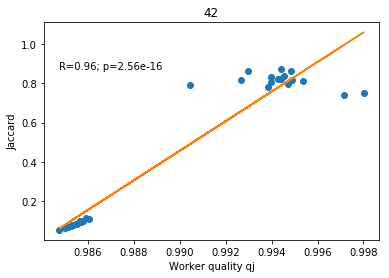

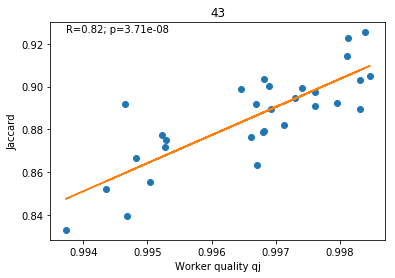

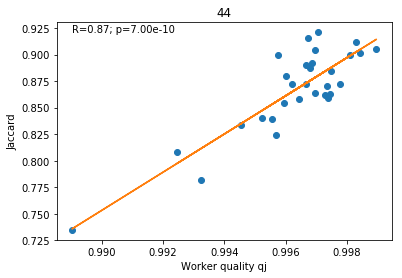

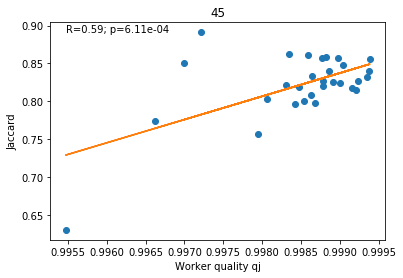

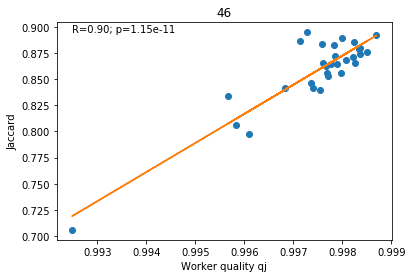

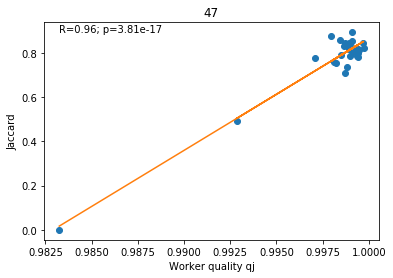

In [341]:
for objid in object_lst:
    selected_df = qj_df[(qj_df["sample"]=="30workers_rand0")&(qj_df["objid"]==objid)&(qj_df["clust"]==-1)]
    plt.figure()
    plt.title(objid)
    x = np.array(selected_df["qj"])
    y = np.array(selected_df["Jaccard [Self]"])
    linresult = linregress(x,y)
    plt.plot(x,y,'o')
    plt.plot(x,linresult.slope*x+linresult.intercept,'-')
    plt.text(min(x),max(y),"R={:.2f}; p={:.2e}".format(linresult.rvalue,linresult.pvalue))
    plt.xlabel("Worker quality qj")
    plt.ylabel("Jaccard")
    # plt.xlim(0.95,1)

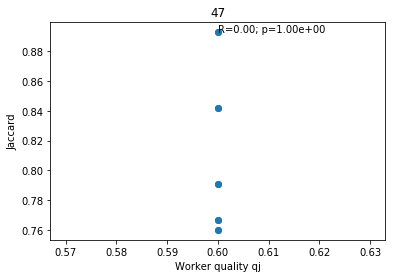

In [131]:
for objid in object_lst:
    selected_df = df[(df["sample"]=="30workers_rand0")&(df["objid"]==objid)&(df["clust"]=="-1")]
    plt.figure()
    plt.title(objid)
    x = np.array(selected_df["qj"])
    y = np.array(selected_df["Jaccard [Self]"])
    linresult = linregress(x,y)
    plt.plot(x,y,'o')
    plt.plot(x,linresult.slope*x+linresult.intercept,'-')
    plt.text(min(x),max(y),"R={:.2f}; p={:.2e}".format(linresult.rvalue,linresult.pvalue))
    plt.xlabel("Worker quality qj")
    plt.ylabel("Jaccard")
    # plt.xlim(0.95,1)